# Airline Kaggle

This challenge is about sentiment analysis from twitter data. Sentiment analysis concerns the opinions or views underlying in tweets. In this challenge we will predict sentiment with respect of six different airline companies during February in 2015. The data set contains about 80k annotated tweets. Each tweet has been labeled as {positive, negative, neutral} label. We have additional information in the data set, such as location, etc.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv', sep=",")
test  = pd.read_csv('data/test.csv', sep=",")
train['period'] = 1
test['period'] = 0
train.head()

,Id,airline_sentiment,airline,retweet_count,text,tweet_coord,tweet_location,user_timezone,period
0,0,positive,Delta,0,@JetBlue I'll pass along the advice. You guys ...,NaN,Massachusetts,Central Time (US & Canada),1
1,1,negative,United,0,@united I sent you a dm with my file reference...,NaN,ny,Quito,1
2,2,positive,Southwest,0,@SouthwestAir Black History Commercial is real...,NaN,La Florida,Eastern Time (US & Canada),1
3,3,negative,Southwest,0,@SouthwestAir why am I still in Baltimore?! @d...,"[39.1848041, -76.6787131]","Tallahassee, FL",America/Chicago,1
4,4,positive,Southwest,0,@SouthwestAir SEA to DEN. South Sound Volleyba...,NaN,NaN,Pacific Time (US & Canada),1


Merge both data frames in one, so it will be easier manage the features in both sets

In [3]:
df = pd.concat([train, test])
df.head()

,Id,airline,airline_sentiment,period,retweet_count,text,tweet_coord,tweet_location,user_timezone
0,0,Delta,positive,1,0,@JetBlue I'll pass along the advice. You guys ...,NaN,Massachusetts,Central Time (US & Canada)
1,1,United,negative,1,0,@united I sent you a dm with my file reference...,NaN,ny,Quito
2,2,Southwest,positive,1,0,@SouthwestAir Black History Commercial is real...,NaN,La Florida,Eastern Time (US & Canada)
3,3,Southwest,negative,1,0,@SouthwestAir why am I still in Baltimore?! @d...,"[39.1848041, -76.6787131]","Tallahassee, FL",America/Chicago
4,4,Southwest,positive,1,0,@SouthwestAir SEA to DEN. South Sound Volleyba...,NaN,NaN,Pacific Time (US & Canada)


Extract twitter account from the message and create another column with this information. Moreover, we will convert all text into lowercase

In [4]:
# Extract twitter information
df['tweet_acc'] = df['text'].str.split(' ', 1).str.get(0) #df.text.str.split().str.get(0)
df['text'] = df['text'].str.split(' ', 1).str[-1]
df.head()

,Id,airline,airline_sentiment,period,retweet_count,text,tweet_coord,tweet_location,user_timezone,tweet_acc
0,0,Delta,positive,1,0,I'll pass along the advice. You guys rock!!,NaN,Massachusetts,Central Time (US & Canada),@JetBlue
1,1,United,negative,1,0,I sent you a dm with my file reference number....,NaN,ny,Quito,@united
2,2,Southwest,positive,1,0,Black History Commercial is really sweet. Well...,NaN,La Florida,Eastern Time (US & Canada),@SouthwestAir
3,3,Southwest,negative,1,0,why am I still in Baltimore?! @delta is doing ...,"[39.1848041, -76.6787131]","Tallahassee, FL",America/Chicago,@SouthwestAir
4,4,Southwest,positive,1,0,SEA to DEN. South Sound Volleyball team on its...,NaN,NaN,Pacific Time (US & Canada),@SouthwestAir


## Data Analysis

Counting the number of each type of sentiments to know if the dataset is balanced or not

In [5]:
df.airline_sentiment.value_counts()

negative    5519
neutral     1857
positive    1408
Name: airline_sentiment, dtype: int64

And a visualization to make with the percentatges

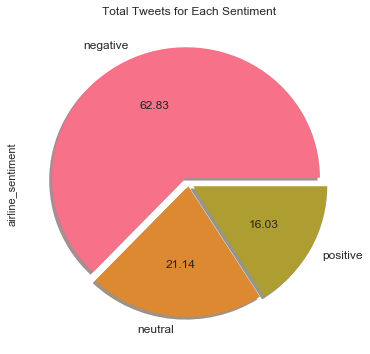

In [6]:
colors=sns.color_palette("husl", 10)
pd.Series(df["airline_sentiment"]).value_counts().plot(kind="pie", colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

Let's plot how many tweets each airline has received

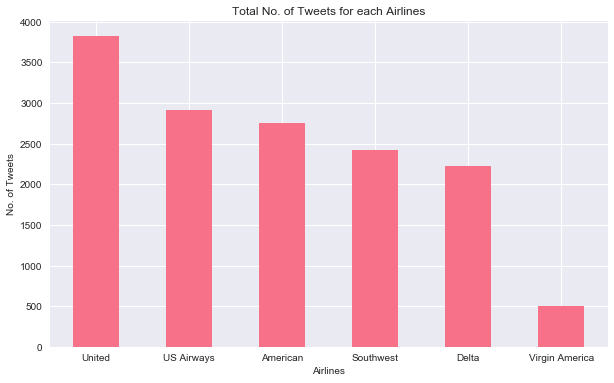

In [7]:
colors=sns.color_palette("husl", 10) 
pd.Series(df["airline"]).value_counts().plot(kind = "bar",
                                             color=colors, figsize=(10,6),
                                             fontsize=10, rot = 0, 
                                             title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

Percentage of tweets for each airline splitted by sentiment

In [8]:
air_senti=pd.crosstab(df.airline, df.airline_sentiment)
percent=air_senti.apply(lambda a: round(a / a.sum() * 100, 2), axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
American,69.93,18.04,12.03
Delta,42.08,33.38,24.54
Southwest,48.95,27.27,23.78
US Airways,77.73,12.53,9.74
United,69.80,17.83,12.37
Virgin America,38.82,31.91,29.28


### Missing data

How many missing data we have in the dataset? We can see that the percentatge of the missing data is equal in the train and test set

In [9]:
pct_na_train = train.isnull().sum()/len(train)*100
pct_na_test = test.isnull().sum()/len(test)*100
print(pct_na_train, pct_na_test)

Id                    0.000000
airline_sentiment     0.000000
airline               0.000000
retweet_count         0.000000
text                  0.000000
tweet_coord          92.736794
tweet_location       31.898907
user_timezone        33.128415
period                0.000000
dtype: float64 Id                 0.000000
airline            0.000000
retweet_count      0.000000
text               0.000000
tweet_coord       93.493852
tweet_location    32.974727
user_timezone     32.616120
period             0.000000
dtype: float64


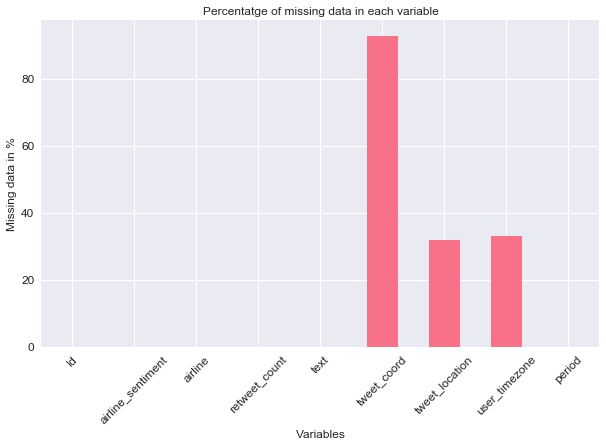

In [10]:
colors=sns.color_palette("husl", 10) 
pd.Series(pct_na_train).plot(kind = "bar",
                             color=colors, figsize=(10,6),
                             fontsize=12, rot = 45, 
                             title = "Percentatge of missing data in each variable")
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Missing data in %', fontsize=12)

With this missing data we can try three things: 

1. Remove the three columns that has missing data.
2. Remove the rows that has missing data in that columns but before that we shoud check how this missing data are distributed because it could be the case that all the rows affected where from on specific class.
3. Impute the values of the 'tweet_location' and 'user_timezone' and remove 'tweet_coord' (due to the high number os missings) 

How complex/difficult it can be impute the missing values?

In [11]:
print('There are {} unique values in "tweet_location" and {} in "user_timezone."' .
      format(len(df.tweet_location.unique()), len(df.user_timezone.unique())))

There are 3082 unique values in "tweet_location" and 86 in "user_timezone."


## Preprocessing

The objective of this part is extract features from the text and create new variables that may improve the performance of our models

### Split data

After some preprocessing task and feature creation we can split again the data set into a train and test sets.

In [12]:
train = df[(df.period == 1)]
test  = df[(df.period == 0)]

X = train[train.columns.difference(['airline_sentiment'])]
y = train['airline_sentiment']

Then we are going to split the training data set in order to be able to evaluate different models and build ensembles. We will create train, evaluation and test.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

### Feature extraction from text

In [14]:
from __future__ import print_function

from pprint import pprint
from time import time
import logging

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE

A Pipeline is used to concatenate the feature extraction, using CountVectorizer and TfidfTransformer, then Smote method to encrease the number of samples of the small class and finally the Multinomial Naive Bayes classifier. For each step of the pipeline we use a gridsearch to optimize the hyperparameters of each step.

In [15]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s %(levelname)s %(message)s')

# Define a pipeline combining for the text column
smt = SMOTE(random_state=42)
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('smote', smt),
    ('NaiveBayes', MultinomialNB()),
])


parameters = {
    'vect__max_df': (0.4, 0.5, 0.6, 0.7),
    'vect__max_features': [None],
    'vect__ngram_range': ((1, 1), (1, 2)), # unigrams or bigrams
    'vect__stop_words': ["english", None],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'NaiveBayes__alpha': [0.05, 0.1, 0.15, 0.2],
    'NaiveBayes__fit_prior': (True, False),
}

target = y_train.values
data = X_train['text'].values

Multiprocessing requires the fork to happen in a __main__ protected block. For more information about this code:

http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html

In [16]:
if __name__ == "__main__":
    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=3)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data, target)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        

Performing grid search...
pipeline: ['vect', 'tfidf', 'smote', 'NaiveBayes']
parameters:
{'NaiveBayes__alpha': [0.05, 0.1, 0.15, 0.2],
 'NaiveBayes__fit_prior': (True, False),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.4, 0.5, 0.6, 0.7),
 'vect__max_features': [None],
 'vect__ngram_range': ((1, 1), (1, 2)),
 'vect__stop_words': ['english', None]}
Fitting 3 folds for each of 512 candidates, totalling 1536 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 1536 out of 1536 | elapsed: 36.5min finished


done in 2193.101s

Best score: 0.781
Best parameters set:
	NaiveBayes__alpha: 0.15
	NaiveBayes__fit_prior: True
	tfidf__norm: 'l2'
	tfidf__use_idf: False
	vect__max_df: 0.4
	vect__max_features: None
	vect__ngram_range: (1, 2)
	vect__stop_words: None


In [17]:
# Esto seria con la validacion
from sklearn.metrics import classification_report
y_true, y_pred = y_test, grid_search.best_estimator_.predict(X_test['text'])
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

   negative       0.83      0.91      0.87      1816
    neutral       0.66      0.54      0.59       630
   positive       0.75      0.66      0.70       453

avg / total       0.78      0.79      0.78      2899



## Prediction of Submission set

In [18]:
# Predictions
y_pred = grid_search.best_estimator_.predict(test['text'])

# Create the submission file
submission = pd.DataFrame()
submission["Prediction"]=y_pred

submission.to_csv("submission.csv", index_label="Id")
submission.head()

,Prediction
0,negative
1,negative
2,neutral
3,negative
4,positive
